# Super Simple Keras model on TriFeature for multiplicity determination

In [1]:
# For this network, GPU is slower than CPU -> Disable CUDA
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
import kerastuner

print("tensorflow", tensorflow.__version__)
print("keras", keras.__version__)
print("keras-tuner", kerastuner.__version__)

tensorflow 2.1.0
keras 2.2.4-tf
keras-tuner 1.0.1


In [3]:
num_dp = 30
max_neutrons = 5
label = "nPH"

traindata = pd.read_pickle(f"data/training_600AMeV_{num_dp}dp.pkl").sample(frac=1)
x_train = traindata[["nHits", "nClus", "Edep"]].values
y_train = keras.utils.to_categorical(traindata[[label]].values.ravel())

valdata = pd.read_pickle(f"data/validation_600AMeV_{num_dp}dp.pkl").sample(frac=1)
x_val = valdata[["nHits", "nClus", "Edep"]].values
y_val = keras.utils.to_categorical(valdata[[label]].values.ravel());

In [4]:
def build_model(hp):
    model = keras.models.Sequential()
    model.add(
        keras.layers.Dense(
            units=hp.Int("unitsl1", min_value=10, max_value=500, step=30),
            activation="relu",
            input_shape=(3,),
        )
    )
    model.add(
        keras.layers.Dense(
            units=hp.Int("unitsl2", min_value=5, max_value=50, step=5),
            activation="relu",
        )
    )
    model.add(keras.layers.Dense(units=max_neutrons + 1, activation="softmax"))

    optimizer = keras.optimizers.Adagrad(
        hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    )
    loss = keras.losses.categorical_crossentropy
    model.compile(loss=loss, optimizer=optimizer, metrics=["acc"])
    return model

In [5]:
tuner = kerastuner.tuners.RandomSearch(
    build_model,
    objective="val_acc",
    max_trials=5,
    executions_per_trial=3,
    directory="tmp-simple2",
    project_name="simple",
)
tuner.search_space_summary()

In [6]:
tuner.search(
    x_train,
    y_train,
    epochs=20,
    batch_size=1000,
    validation_data=(x_val, y_val),
    verbose=2,
)

Train on 4999569 samples, validate on 50000 samples
Epoch 1/20
4999569/4999569 - 14s - loss: 1.2789 - acc: 0.5105 - val_loss: 0.8855 - val_acc: 0.6992
Epoch 2/20
4999569/4999569 - 13s - loss: 0.7908 - acc: 0.6925 - val_loss: 0.7471 - val_acc: 0.7076
Epoch 3/20
4999569/4999569 - 13s - loss: 0.7060 - acc: 0.7121 - val_loss: 0.6906 - val_acc: 0.6999
Epoch 4/20
4999569/4999569 - 14s - loss: 0.6749 - acc: 0.7166 - val_loss: 0.6640 - val_acc: 0.7206
Epoch 5/20
4999569/4999569 - 13s - loss: 0.6610 - acc: 0.7189 - val_loss: 0.6554 - val_acc: 0.7187
Epoch 6/20
4999569/4999569 - 14s - loss: 0.6538 - acc: 0.7201 - val_loss: 0.6496 - val_acc: 0.7242
Epoch 7/20
4999569/4999569 - 14s - loss: 0.6495 - acc: 0.7209 - val_loss: 0.6496 - val_acc: 0.7119
Epoch 8/20
4999569/4999569 - 14s - loss: 0.6464 - acc: 0.7216 - val_loss: 0.6440 - val_acc: 0.7204
Epoch 9/20
4999569/4999569 - 14s - loss: 0.6441 - acc: 0.7222 - val_loss: 0.6426 - val_acc: 0.7266
Epoch 10/20
4999569/4999569 - 14s - loss: 0.6424 - acc: 0

Train on 4999569 samples, validate on 50000 samples
Epoch 1/20
4999569/4999569 - 42s - loss: 2.1447 - acc: 0.1956 - val_loss: 1.5231 - val_acc: 0.2064
Epoch 2/20
4999569/4999569 - 39s - loss: 1.5099 - acc: 0.2110 - val_loss: 1.4989 - val_acc: 0.2146
Epoch 3/20
4999569/4999569 - 40s - loss: 1.4912 - acc: 0.2245 - val_loss: 1.4836 - val_acc: 0.2321
Epoch 4/20
4999569/4999569 - 40s - loss: 1.4793 - acc: 0.2372 - val_loss: 1.4745 - val_acc: 0.2423
Epoch 5/20
4999569/4999569 - 41s - loss: 1.4705 - acc: 0.2465 - val_loss: 1.4661 - val_acc: 0.2517
Epoch 6/20
4999569/4999569 - 40s - loss: 1.4630 - acc: 0.2546 - val_loss: 1.4589 - val_acc: 0.2593
Epoch 7/20
4999569/4999569 - 40s - loss: 1.4561 - acc: 0.2644 - val_loss: 1.4524 - val_acc: 0.2716
Epoch 8/20
4999569/4999569 - 40s - loss: 1.4497 - acc: 0.2724 - val_loss: 1.4463 - val_acc: 0.2754
Epoch 9/20
4999569/4999569 - 39s - loss: 1.4441 - acc: 0.2786 - val_loss: 1.4410 - val_acc: 0.2796
Epoch 10/20
4999569/4999569 - 40s - loss: 1.4390 - acc: 0

Train on 4999569 samples, validate on 50000 samples
Epoch 1/20
4999569/4999569 - 18s - loss: 1.7301 - acc: 0.2156 - val_loss: 1.6539 - val_acc: 0.2183
Epoch 2/20
4999569/4999569 - 18s - loss: 1.6208 - acc: 0.2653 - val_loss: 1.6240 - val_acc: 0.2221
Epoch 3/20
4999569/4999569 - 17s - loss: 1.4549 - acc: 0.3919 - val_loss: 1.3417 - val_acc: 0.4328
Epoch 4/20
4999569/4999569 - 18s - loss: 1.2646 - acc: 0.4509 - val_loss: 1.1369 - val_acc: 0.4141
Epoch 5/20
4999569/4999569 - 19s - loss: 1.1526 - acc: 0.4940 - val_loss: 1.1080 - val_acc: 0.5158
Epoch 6/20
4999569/4999569 - 17s - loss: 1.0344 - acc: 0.5487 - val_loss: 1.0856 - val_acc: 0.4674
Epoch 7/20
4999569/4999569 - 18s - loss: 0.9171 - acc: 0.5946 - val_loss: 0.8502 - val_acc: 0.7076
Epoch 8/20
4999569/4999569 - 17s - loss: 0.8455 - acc: 0.6715 - val_loss: 0.7992 - val_acc: 0.6981
Epoch 9/20
4999569/4999569 - 17s - loss: 0.8035 - acc: 0.6853 - val_loss: 0.7860 - val_acc: 0.6746
Epoch 10/20
4999569/4999569 - 17s - loss: 0.7755 - acc: 0

Train on 4999569 samples, validate on 50000 samples
Epoch 1/20
4999569/4999569 - 31s - loss: 1.8319 - acc: 0.2315 - val_loss: 1.6762 - val_acc: 0.2267
Epoch 2/20
4999569/4999569 - 30s - loss: 1.6515 - acc: 0.2169 - val_loss: 1.6331 - val_acc: 0.2072
Epoch 3/20
4999569/4999569 - 30s - loss: 1.6121 - acc: 0.2083 - val_loss: 1.5927 - val_acc: 0.2099
Epoch 4/20
4999569/4999569 - 31s - loss: 1.5506 - acc: 0.2128 - val_loss: 1.5196 - val_acc: 0.2118
Epoch 5/20
4999569/4999569 - 30s - loss: 1.4820 - acc: 0.2196 - val_loss: 1.4471 - val_acc: 0.2179
Epoch 6/20
4999569/4999569 - 30s - loss: 1.4171 - acc: 0.2271 - val_loss: 1.3931 - val_acc: 0.2975
Epoch 7/20
4999569/4999569 - 30s - loss: 1.3662 - acc: 0.2671 - val_loss: 1.3467 - val_acc: 0.3489
Epoch 8/20
4999569/4999569 - 30s - loss: 1.3226 - acc: 0.3414 - val_loss: 1.3047 - val_acc: 0.3665
Epoch 9/20
4999569/4999569 - 29s - loss: 1.2846 - acc: 0.4050 - val_loss: 1.2690 - val_acc: 0.4236
Epoch 10/20
4999569/4999569 - 30s - loss: 1.2507 - acc: 0

Train on 4999569 samples, validate on 50000 samples
Epoch 1/20
4999569/4999569 - 19s - loss: 6.3624 - acc: 0.2075 - val_loss: 1.5581 - val_acc: 0.2171
Epoch 2/20
4999569/4999569 - 18s - loss: 1.5375 - acc: 0.2164 - val_loss: 1.5228 - val_acc: 0.2221
Epoch 3/20
4999569/4999569 - 18s - loss: 1.5130 - acc: 0.2206 - val_loss: 1.5051 - val_acc: 0.2209
Epoch 4/20
4999569/4999569 - 19s - loss: 1.4984 - acc: 0.2249 - val_loss: 1.4929 - val_acc: 0.2279
Epoch 5/20
4999569/4999569 - 19s - loss: 1.4873 - acc: 0.2310 - val_loss: 1.4829 - val_acc: 0.2327
Epoch 6/20
4999569/4999569 - 19s - loss: 1.4783 - acc: 0.2365 - val_loss: 1.4751 - val_acc: 0.2407
Epoch 7/20
4999569/4999569 - 19s - loss: 1.4711 - acc: 0.2412 - val_loss: 1.4687 - val_acc: 0.2475
Epoch 8/20
4999569/4999569 - 18s - loss: 1.4650 - acc: 0.2461 - val_loss: 1.4628 - val_acc: 0.2470
Epoch 9/20
4999569/4999569 - 18s - loss: 1.4596 - acc: 0.2510 - val_loss: 1.4576 - val_acc: 0.2581
Epoch 10/20
4999569/4999569 - 19s - loss: 1.4545 - acc: 0

INFO:tensorflow:Oracle triggered exit


In [7]:
tuner.results_summary()

In [8]:
from sklearn.metrics import (
    balanced_accuracy_score,
    confusion_matrix,
    plot_confusion_matrix,
)

model = tuner.get_best_models()[0]

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

testdata = pd.read_pickle(f"data/test_600AMeV_{num_dp}dp.pkl").sample(frac=1)
x_test = testdata[["nHits", "nClus", "Edep"]].values
y_true = testdata[[label]].values.ravel()

y_pred = model.predict(x_test)
print(list(zip(y_true, y_pred))[0:10])


y_pred = np.argmax(y_pred, axis=1)

bac = balanced_accuracy_score(y_true, y_pred)
print(bac)
cm = confusion_matrix(y_true, y_pred, labels=range(0, 6))
print(cm)
cmrel = confusion_matrix(y_true, y_pred, labels=range(0, 6), normalize="true")
print(cmrel)

[(1, array([0.   , 0.826, 0.17 , 0.004, 0.   , 0.   ], dtype=float32)), (3, array([0.001, 0.003, 0.776, 0.211, 0.008, 0.   ], dtype=float32)), (3, array([0.002, 0.   , 0.096, 0.668, 0.202, 0.032], dtype=float32)), (1, array([0.   , 0.846, 0.15 , 0.004, 0.   , 0.   ], dtype=float32)), (5, array([0.   , 0.   , 0.   , 0.003, 0.166, 0.832], dtype=float32)), (4, array([0.   , 0.   , 0.009, 0.439, 0.424, 0.127], dtype=float32)), (1, array([0.   , 0.973, 0.027, 0.   , 0.   , 0.   ], dtype=float32)), (2, array([0.   , 0.882, 0.116, 0.002, 0.   , 0.   ], dtype=float32)), (1, array([0.  , 0.99, 0.01, 0.  , 0.  , 0.  ], dtype=float32)), (2, array([0.001, 0.003, 0.757, 0.23 , 0.008, 0.   ], dtype=float32))]
0.7730726797702713
[[ 2363     0     0     0     0     0]
 [    0 99468  2783     0     0     0]
 [    0 15334 75805 10884     2     0]
 [    0   922 19645 67921 13493    22]
 [    0    39  1918 25351 59255 14699]
 [    0     0    91  3349 26135 60486]]
[[1.    0.    0.    0.    0.    0.   ]
 [

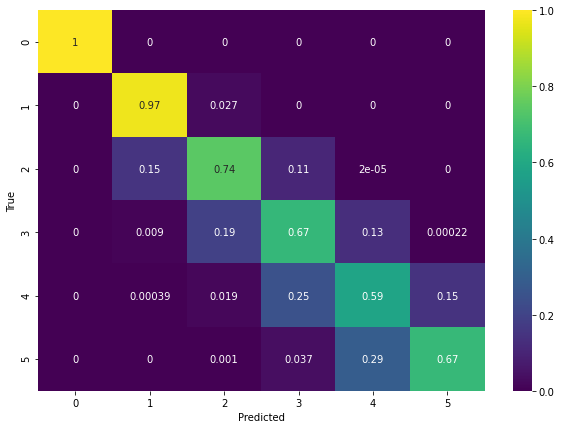

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
ax = sns.heatmap(cmrel, cmap="viridis", annot=True)
ax.set_xlabel("Predicted")
ax.set_ylabel("True");